**Context: **

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customers first apply for a home loan after that company manually validates the customer eligibility for loan. Company wants to automate the loan eligibility process based on customer detail provided while filling the details online.

They need a web application where a user can access their website and register, login, and enter the required details such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others for checking the eligibility for the home loan.

**SL. No.    Attribute.            Description**
1.         **Loan ID**              Unique Loan ID

2.        **Gender**               Male or Female

3.         **Married**             Applicant married (Y/N)

4.         **Dependents**           Number of dependents


5.         **Self employed**         Self employed (Y/N)


6.         **Education**            Graduate/Undergraduate

7.         **Applicant Income**     Applicant income (in dollars)

8.         **Co Applicant Income**   Co Applicant Income (in dollars)

9.         **Loan Amount**         Loan amount in thousands (in dollars)

10.        **Loan Amount Term.**     Term of loan in months

11.       **Credit History.**       Credit history meets guidelines Yes/No(1/0)

12.        **Property area.**        Urban/Semi Urban/Rural

13.        **Loan Status(Target).**  Loan Approved (Y/N)

**Steps to the project:**

**Import required libraries and read the dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold,cross_validate
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('loan_approval_data.csv')
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


**Check the first few samples, shape, info of the data and try to familiarize yourself with different features**

In [3]:
#shape
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


**Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features.**

In [5]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [6]:
df.size


7982

In [7]:
df.isnull().sum().sum()

149

In [8]:
149/7982


0.018667000751691306

1. data has 614 rows and 13 columns in it.

2. datatype 8 variables are categorical and 5 are numerical.

3. missing values are present in 6 variables.

4. will treat them after analysing.

In [9]:
## will treat numerical variables with median strategy to impute.
for col in ['dependents','loanamount','loan_amount_term','credit_history']:
    df[col].fillna(df[col].median(), inplace=True)

In [13]:
## Lets treat categoricak columns with mode imputation technique.
for col in ['gender','self_employed','married']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
#checking variable after imputation
df.isnull().sum().sum()

0

In [20]:
## dropping the column "Loan_Id" as it doesnt have any relevance.
df.drop('loan_id',axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    object 
 1   married            614 non-null    object 
 2   dependents         614 non-null    float64
 3   education          614 non-null    object 
 4   self_employed      614 non-null    object 
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         614 non-null    float64
 8   loan_amount_term   614 non-null    float64
 9   credit_history     614 non-null    float64
 10  property_area      614 non-null    object 
 11  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


**Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.**

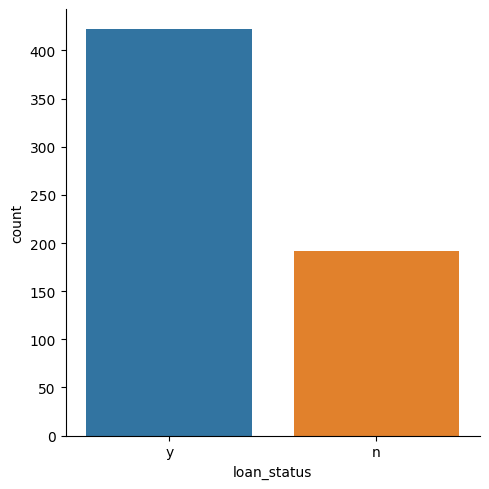

In [28]:
## let us check the distribution of the column loan_status
sns.catplot(data=df, x="loan_status", kind="count");

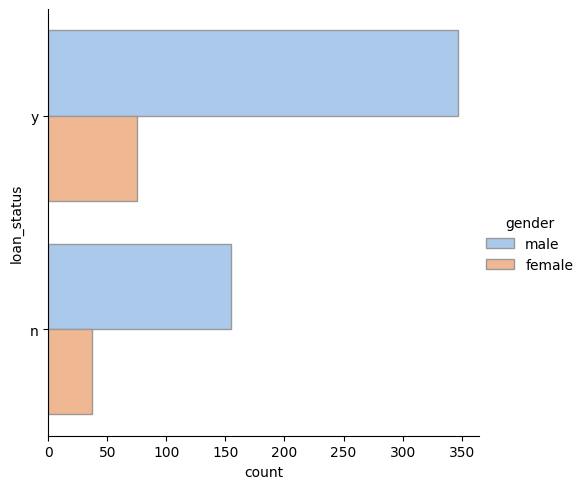

In [29]:
sns.catplot(
    data=df, y="loan_status", hue="gender", kind="count",
    palette="pastel", edgecolor=".6",
);

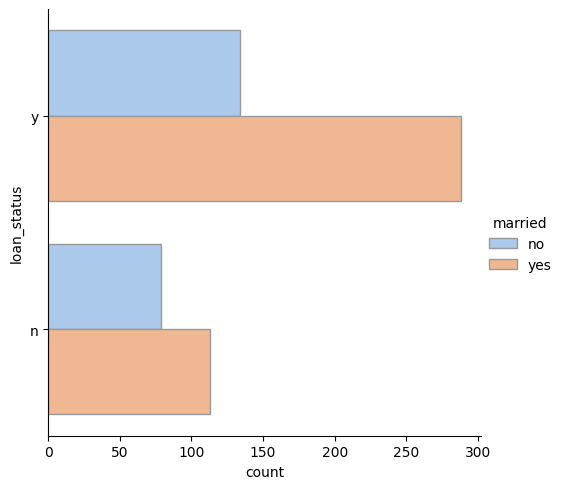

In [30]:
sns.catplot(
    data=df, y="loan_status", hue="married", kind="count",
    palette="pastel", edgecolor=".6",
);

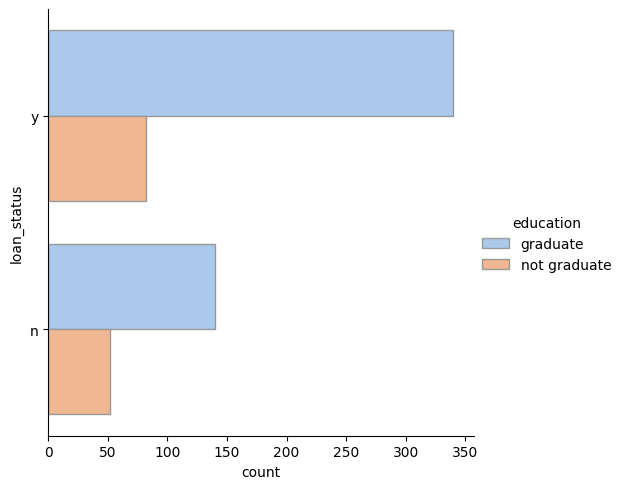

In [31]:
sns.catplot(
    data=df, y="loan_status", hue="education", kind="count",
    palette="pastel", edgecolor=".6",);

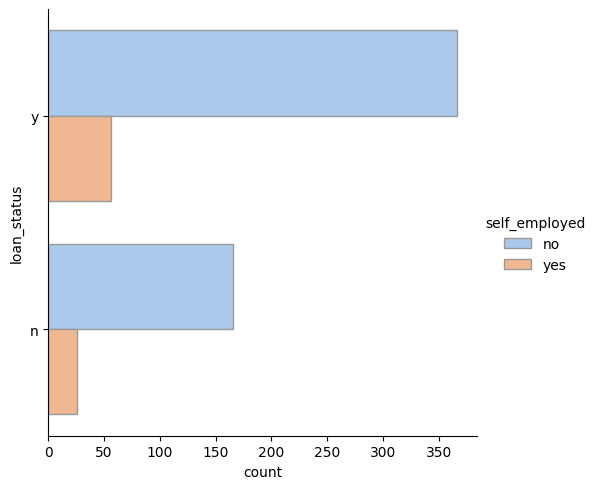

In [32]:
sns.catplot(
    data=df, y="loan_status", hue="self_employed", kind="count",
    palette="pastel", edgecolor=".6",);

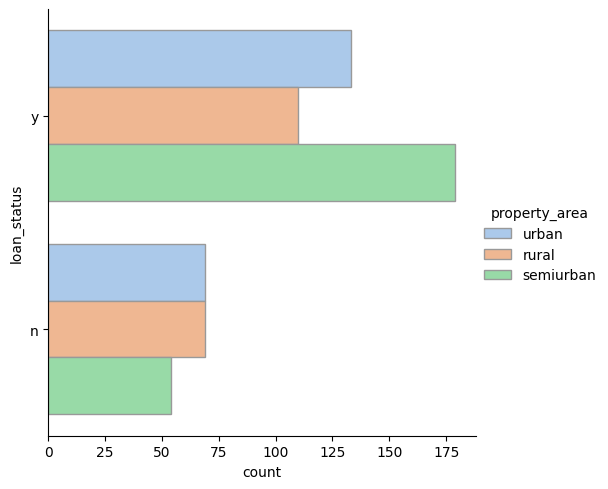

In [33]:
sns.catplot(
    data=df, y="loan_status", hue="property_area", kind="count",
    palette="pastel", edgecolor=".6",);

1. Male applicants are more in numbers in getting loan approved.

2. Married ones are getting more of loan approved.

3. Graduats are getting more than under grad.

4. Salaried people are the one getting more loan approved.

5. more loan getting approved for people living in semiurban & urban areas.



**Encode the categorical data.**

In [34]:
#will check the unique values on each categorical column
df['loan_status'].unique()

array(['y', 'n'], dtype=object)

In [35]:
#will check the unique values on each categorical column
df['gender'].unique()

array(['male', 'female'], dtype=object)

In [36]:
#will check the unique values on each categorical column
df['married'].unique()

array(['no', 'yes'], dtype=object)

In [37]:
#will check the unique values on each categorical column
df['education'].unique()

array(['graduate', 'not graduate'], dtype=object)

In [38]:
#will check the unique values on each categorical column
df['self_employed'].unique()

array(['no', 'yes'], dtype=object)

In [39]:
#will check the unique values on each categorical column
df['property_area'].unique()

array(['urban', 'rural', 'semiurban'], dtype=object)

In [40]:
#Manual encoding
df['loan_status'] = df['loan_status'].replace({'y':0, 'n':1})
df['gender'] = df['gender'].replace({'male':0, 'female':1})
df['married'] = df['married'].replace({'no':0, 'yes':1})
df['education'] = df['education'].replace({'graduate':0, 'not graduate':1})
df['self_employed'] = df['self_employed'].replace({'no':0, 'yes':1})
df['property_area'] = df['property_area'].replace({'urban':0, 'rural':1,'semiurban':2})

**Checking the variables after manually encoding them**

In [42]:
df['loan_status'].unique()

array([0, 1])

In [43]:
df['gender'].unique()

array([0, 1])

In [44]:
df['married'].unique()

array([0, 1])

In [45]:
df['education'].unique()

array([0, 1])

In [46]:
df['self_employed'].unique()

array([0, 1])

In [47]:
df['property_area'].unique()

array([0, 1, 2])

In [48]:
#checking the data first five rows again
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,0,0
1,0,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,1,1
2,0,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,0,0
3,0,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,0,0
4,0,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,0,0


**Separate the target and independent features and split the data into train and test**

In [49]:
#separating the target and independent variables
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [50]:
#splting the data in test and train in 70:30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(429, 11) (185, 11)
(429,) (185,)



Build any classification model to predict the loan status of the customer
and save your model using pickle

In [51]:
## building a random forest regressor model
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
## will check the r2-score to see hows our model is performing

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

print('r2-score train:',r2_train)
print('r2-score test',r2_test)

r2-score train: 0.8914896645981087
r2-score test 0.2256853965466783


**Create a pickle file with an extension as .pkl**

In [53]:
import pickle
# Saving model to disk
pickle.dump(rf, open('model.pkl','wb'))